# SO IN THIS PROJECT, WE ARE GOING TO BE PREDICTING THE POKER HAND.

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from yellowbrick.classifier import ClassBalance, ClassPredictionError, ROCAUC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ROCAUC, ClassificationReport

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
pokerDF = pd.read_csv('/content/drive/MyDrive/Datasets/poker_hand_test.data')
pokerDF.head(5)
#pokerDF.info()
#pokerDF.isnull().any()
pokerDF.shape

(999999, 11)

NOW WE PRE-PROCESS AND ANALYZE THE DATA

First we update the column names.

In [8]:
pokerDF.columns = ['first_suit', 'first_rank', 'second_suit', 'second_rank', 'third_suit', 'third_rank',
'fourth_suit', 'fourth_rank', 'fifth_suit', 'fifth_rank', 'hand']

labels = ['zilch', 'one_pair', 'two_pair', 'three_of_a_kind', 'straight', 'flush', 'full_house',
'four_of_a_kind', 'straight_flush', 'royal_flush']
pokerDF

,first_suit,first_rank,second_suit,second_rank,third_suit,third_rank,fourth_suit,fourth_rank,fifth_suit,fifth_rank,hand
0,3,12,3,2,3,11,4,5,2,5,1
1,1,9,4,6,1,4,3,2,3,9,1
2,1,4,3,13,2,13,2,1,3,6,1
3,3,10,2,7,1,2,2,11,4,9,0
4,1,3,4,5,3,4,1,12,4,6,0
...,...,...,...,...,...,...,...,...,...,...,...
999994,3,1,1,12,2,9,4,9,2,6,1
999995,3,3,4,5,2,7,1,4,4,3,1
999996,1,11,4,7,3,9,1,13,2,7,1
999997,3,11,1,8,1,1,3,13,2,8,1


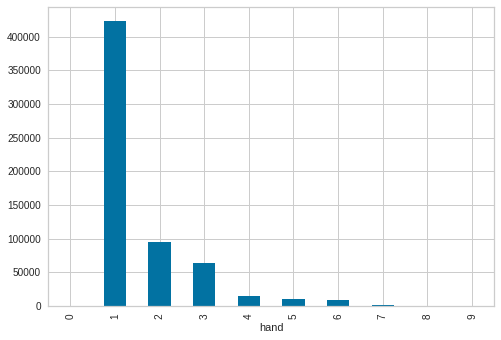

In [9]:
#We want to find out how many classes we have

grouopbylabel = pokerDF.groupby('hand')
grouopbylabel['hand'].sum().plot(kind = 'bar')

In [10]:
#From the bar chart above, we know that we have 9 classes of which trhe class 1 is much more than any other.
grouopbylabel['hand'].sum()

hand
0         0
1    422498
2     95244
3     63363
4     15540
5      9980
6      8544
7      1610
8        96
9        27
Name: hand, dtype: int64

In [11]:
#we separate the data into targets and labels
x_features = pokerDF.iloc[:,0:10]
#y_label = pokerDF.loc[:,['hand']] #selects the hand column and returns it as a new dataframe with on column
y_label = pokerDF.hand #select the hand column and return as a pandas series
#x_features

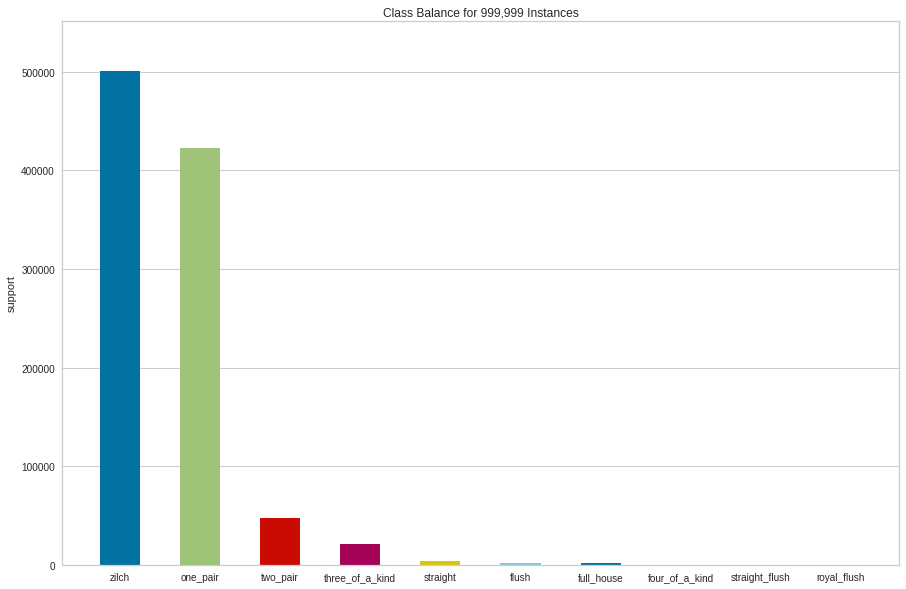

In [13]:
#We need to visualize if class balance is present in our dataset.
bal = ClassBalance(size = (1080, 720), labels = labels)
bal.fit(y_label)
bal.show()

In [31]:
#We now kown there is data imbalance problem in our data
#WE perform data up-sampling for the minority classes
pokerDF.loc[pokerDF['hand']>=5] = 5 #select all rows in pokerDF hand column where value is greater or equal 5, then assign the valaue to be 5
y = pokerDF.hand


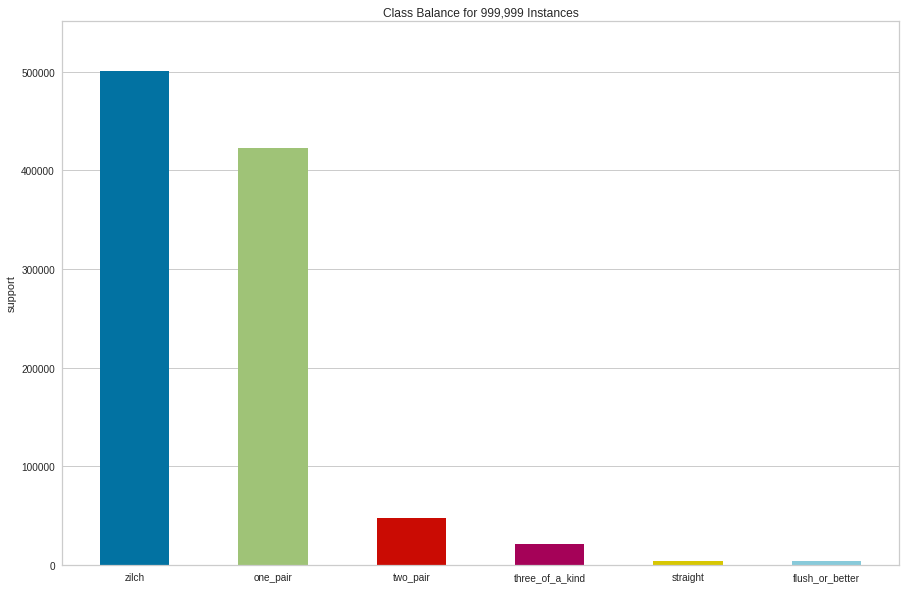

In [17]:
labels = ['zilch', 'one_pair', 'two_pair', 'three_of_a_kind', 'straight', 'flush_or_better']
bal = ClassBalance(size = (1080, 720), labels = labels)
bal.fit(y)
bal.show()

WE NOW TRAIN THE RANDOM FOREST CLASSIFIER

In [20]:
#But first let's perform a feature selection
fitt = SelectKBest(score_func = chi2, k = 'all')
fitt.fit(x_features, y)

TabelScore = pd.DataFrame(fitt.scores_)
TabelFeatures = pd.DataFrame(x_features.columns)
GT = pd.concat([TabelFeatures, TabelScore], axis = 1)
GT.columns = ['features', 'scores']


In [21]:
GT.sort_values(by = 'scores', ascending = False)

,features,scores
8,fifth_suit,9103.596539
2,second_suit,9099.535745
6,fourth_suit,9093.874134
0,first_suit,9091.023395
4,third_suit,9088.117788
1,first_rank,2157.814763
7,fourth_rank,2140.959066
3,second_rank,2139.178128
9,fifth_rank,2139.035230
5,third_rank,2137.440807


WE START WITH THE MLP CLASSIFIER

In [22]:
x = pokerDF[['fifth_suit','second_suit','fourth_suit','first_suit','third_suit' ]]
y = y


In [23]:
#splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5)

In [42]:
#then we craete an instance of the classifier i.e., MLP
multilayerC = MLPClassifier(solver = 'adam', alpha = 0.05, hidden_layer_sizes = (50, 100, 50), learning_rate = 'adaptive', activation = 'tanh')
multilayerC.fit(x_train,y_train)

MLPClassifier(activation='tanh', alpha=0.05, hidden_layer_sizes=(50, 100, 50),
              learning_rate='adaptive')

In [43]:
#NOW WE EVALUATE THE MODEL on our tranining data
pred_train = multilayerC.predict(x_train)
print(accuracy_score(y_train, pred_train)*100)

50.46910093820187


In [44]:
#NOW WE EVALUATE THE MODEL on our test data
pred_test = multilayerC.predict(x_test)
print(accuracy_score(y_test, pred_test)*100)

50.505599999999994


In [ ]:
#ROC CURVE AND AUC
'''rocauc = ROCAUC(multilayerC, size = (1080, 720), classes = labels )

rocauc.score(x_test, y_test)
rocauc.show()'''

/usr/local/lib/python3.8/dist-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


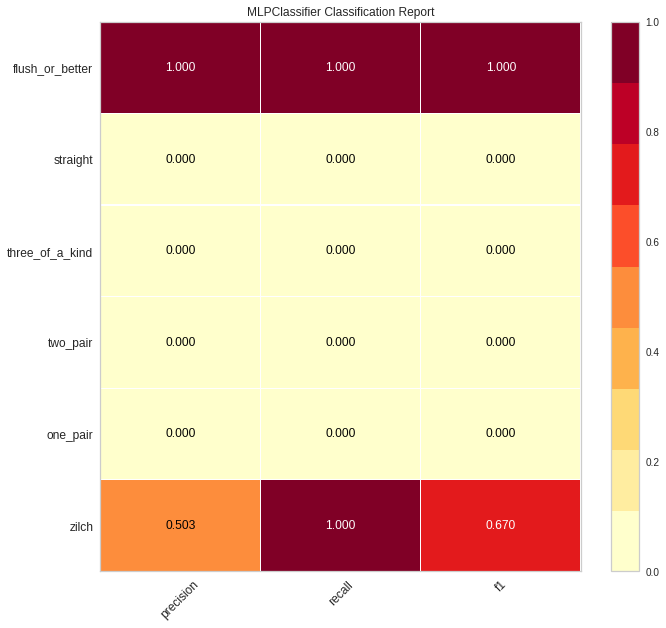

In [56]:
# now using the classification report heatmap
report = ClassificationReport(multilayerC, size = (720, 640), classes = labels)
report.score(x_test, y_test)
report.show()